In [1]:
from datetime import datetime
from collections import defaultdict
import re
import pickle
import pandas as pd
from netCDF4 import Dataset, num2date #pylint: disable=no-name-in-module
import numpy as np
import numpy.ma as ma

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy.optimize as opt
from scipy.stats import linregress
import seaborn as sn
import cmasher as cmr
import mpl_axes_aligner

import os
import sys
from pathlib import Path
path = Path(os.getcwd())
path_parent=str(path.parent.absolute())
path_module=path_parent+'/src/SuPerSim'
sys.path.insert(0, os.path.abspath(path_module))

from SuPerSim import get_all_stats, load_all_pickles, plot_all

In [2]:
################################################
# Here, write the paths to your own data files #
################################################

# this is just introduced for convenience
path_data           = path_parent+'/examples/data/'

# those are the real variables
path_forcing_merra2 = path_data+'/scaled_merra2_Aksaut.nc'
path_ground         = path_data+'North/result_soil_temperature.nc'
path_snow           = path_data+'North/result_snow_depth.nc'
path_swe            = path_data+'North/result_swe.nc'
path_thaw_depth     = path_data+'North/result_thaw_depth.nc'
path_metadata       = path_data+'North/metadata_North.csv'
path_pickle         = path_parent+'/examples/python_pickles/'

path_horizon        = path_data+'/horizon.csv'

###############################################################
# Enter the parameters of your site and of the rockfall event #
###############################################################

site                = 'Aksaut_North'

# CREATE THE PICKLES
year_bkg_end      = 2010
year_trans_end    = 2023
forcing_list      = ['merra2']
path_forcing_list = [path_forcing_merra2]
consecutive       = 7
date_event        = [2021, 12, 31]
topo_event        = []
glacier           = False
min_glacier_depth = 100

# CREATE THE PLOTS
no_weight               = True

print_plots             = True
split_legend            = False
save_plots_pdf          = False

custom_years            = [2019, 2020, 2021]
query                   = {'altitude': 3100, 'slope': 60}

show_hor                = False
show_hist               = False
show_glaciers           = False
show_yearly_box         = False
show_yearly_stats_atmos = False
show_yearly_stats_sims  = False
show_thaw_depth         = False
show_2metrics_seasonal  = False
show_1metric_seasonal   = False
show_decades            = False
show_excep_years        = False
show_normdev            = True
show_landslide_time     = False
show_normdev_bar        = True
show_individual_heatmap = False
show_heatmaps           = False
show_quantiles          = False
show_meltout            = False
show_GST_evol           = False
show_parity             = False

Succesfully opened the pre-existing pickle: df_Aksaut_North.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Aksaut_North.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Aksaut_North.pkl
Succesfully opened the pre-existing pickle: melt_out_Aksaut_North.pkl
Succesfully opened the pre-existing pickle: df_stats_Aksaut_North.pkl
Succesfully opened the pre-existing pickle: rockfall_values_Aksaut_North.pkl

---------------------------------------------------------------------------------------------
------------------------------------- TEMPORAL ANALYSIS -------------------------------------
---------------------------------------------------------------------------------------------

Plots of the normalized distance of air and ground temperature, water production, and thaw_depth as a function of time
We could also called the normalized deviation: standardized anomaly for instance, given by (x-\mu)/\sigma)

------------------------------------------------------

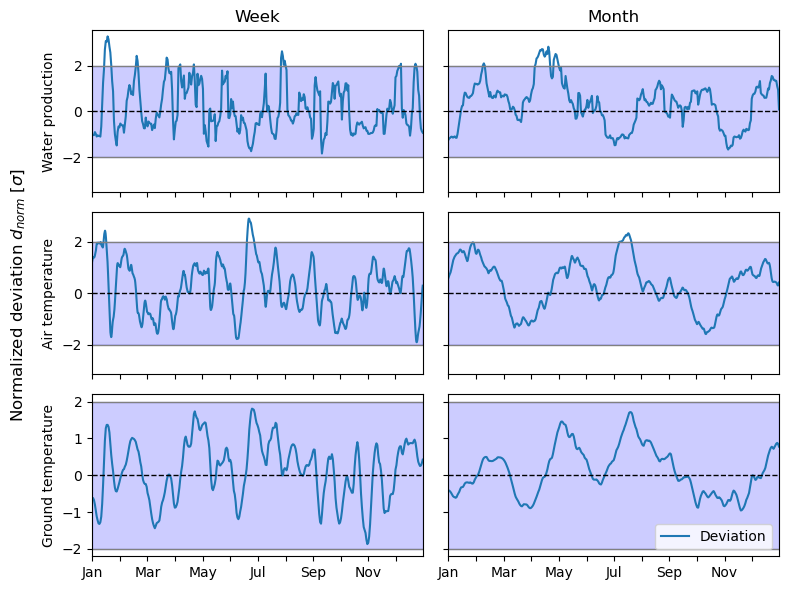

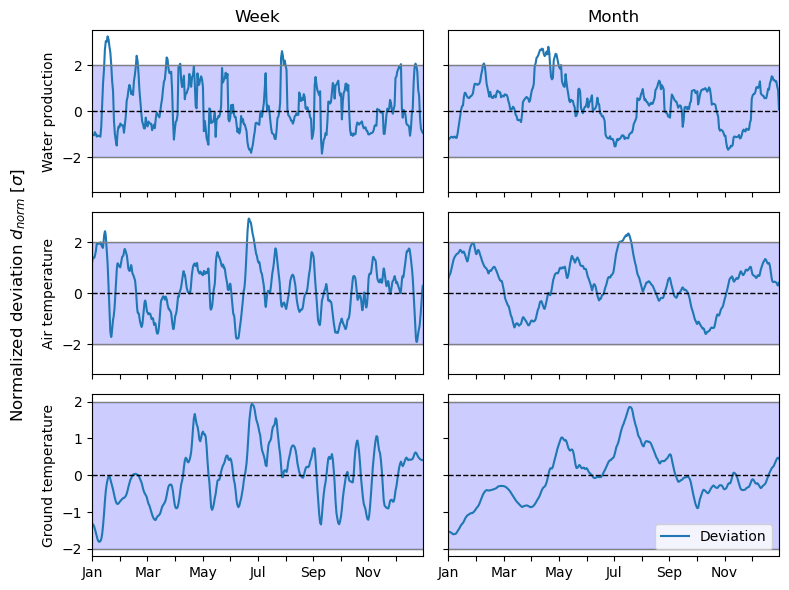


---------------------------------------------------------------------------------------------

Granularity: year, plotted for all years
followed by the ensemble subset _altitude3100_slope60:


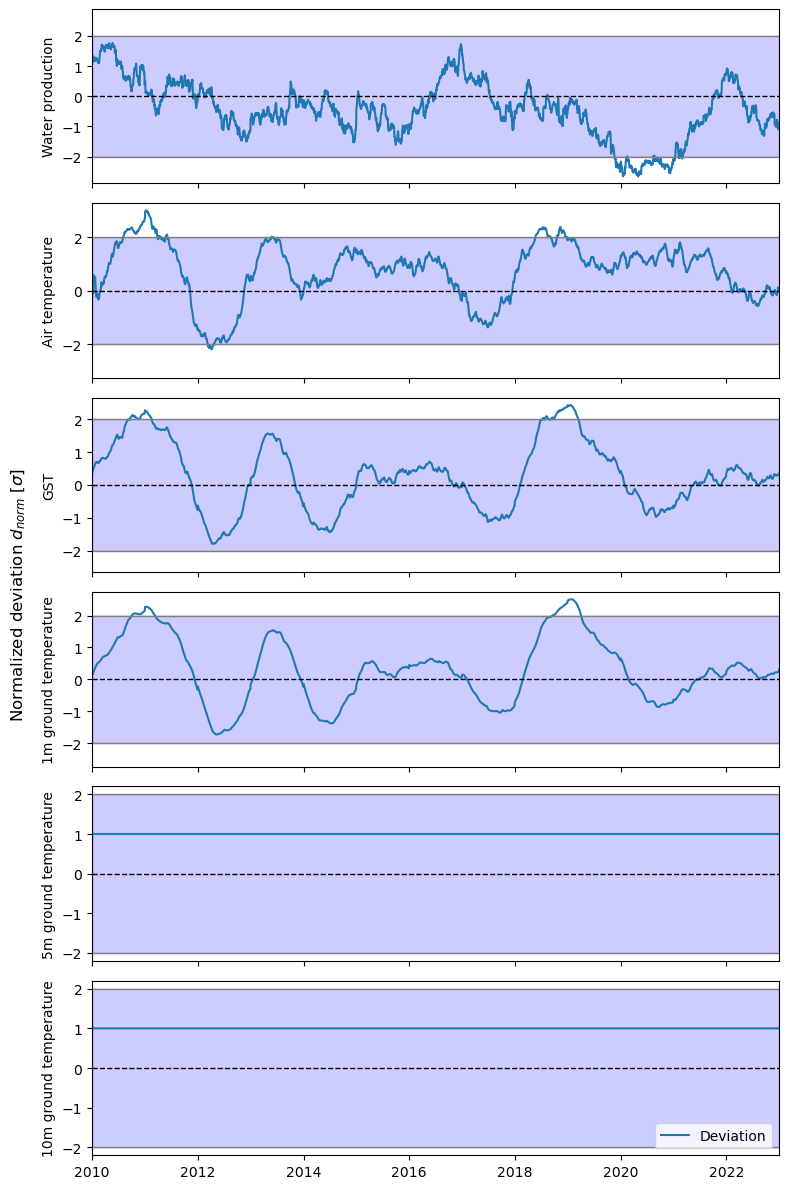

/fs/yedoma/home/vpo001/VikScriptsTests/SuPerSim/src/SuPerSim/runningstats.py:301: RuntimeWarning: invalid value encountered in scalar divide
  distance[year] = {day: (temp_smoothed[list_dates[year][day]]-aggregate_mean[year][day])/aggreagte_std[year][day] for day in range(num_min)}
/fs/yedoma/home/vpo001/VikScriptsTests/SuPerSim/src/SuPerSim/runningstats.py:312: RuntimeWarning: invalid value encountered in scalar divide
  distance[year] = {day: (temp_smoothed[list_dates[year][day]]-aggregate_mean[year][day])/aggreagte_std[year][day] for day in range(num_min)}


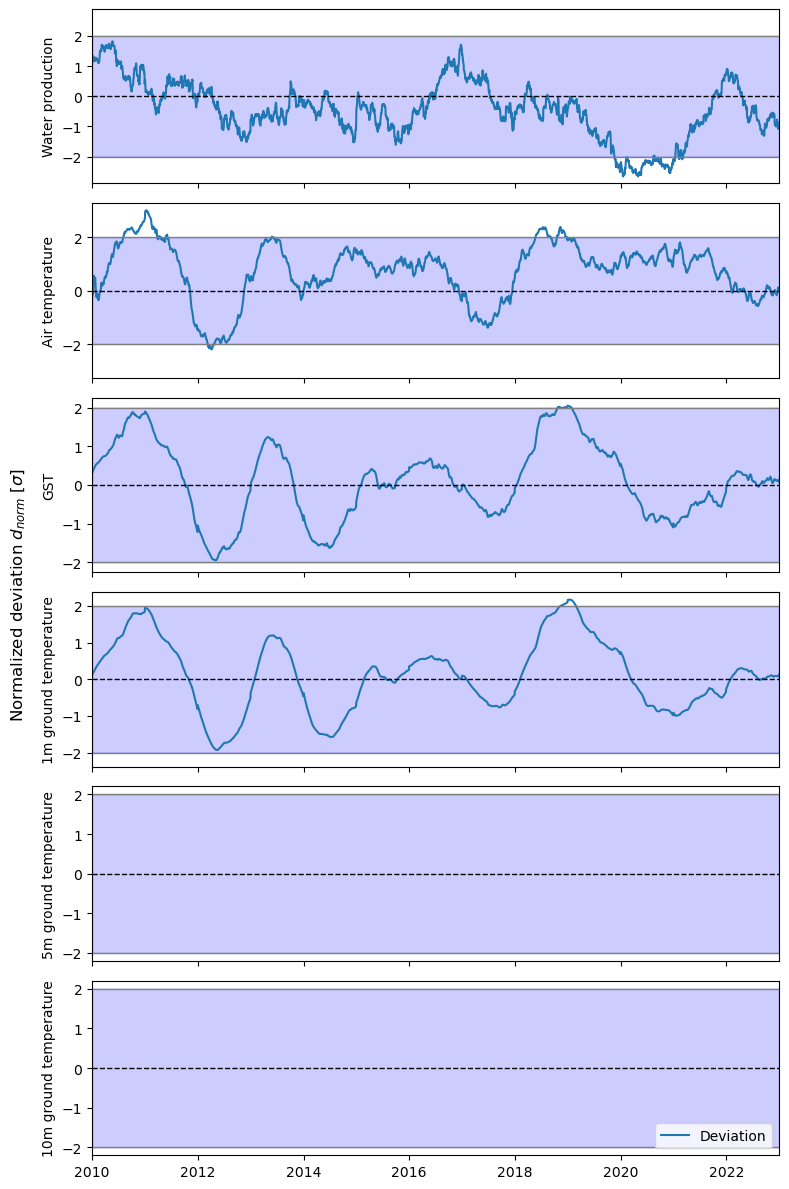

Mean annual bar plots of the normalized distance of air and ground temperature, water production, and thaw_depth as a function of time
We could also called the normalized deviation: standardized anomaly for instance, given by (x-\mu)/\sigma)
followed by the ensemble subset _altitude3100_slope60:


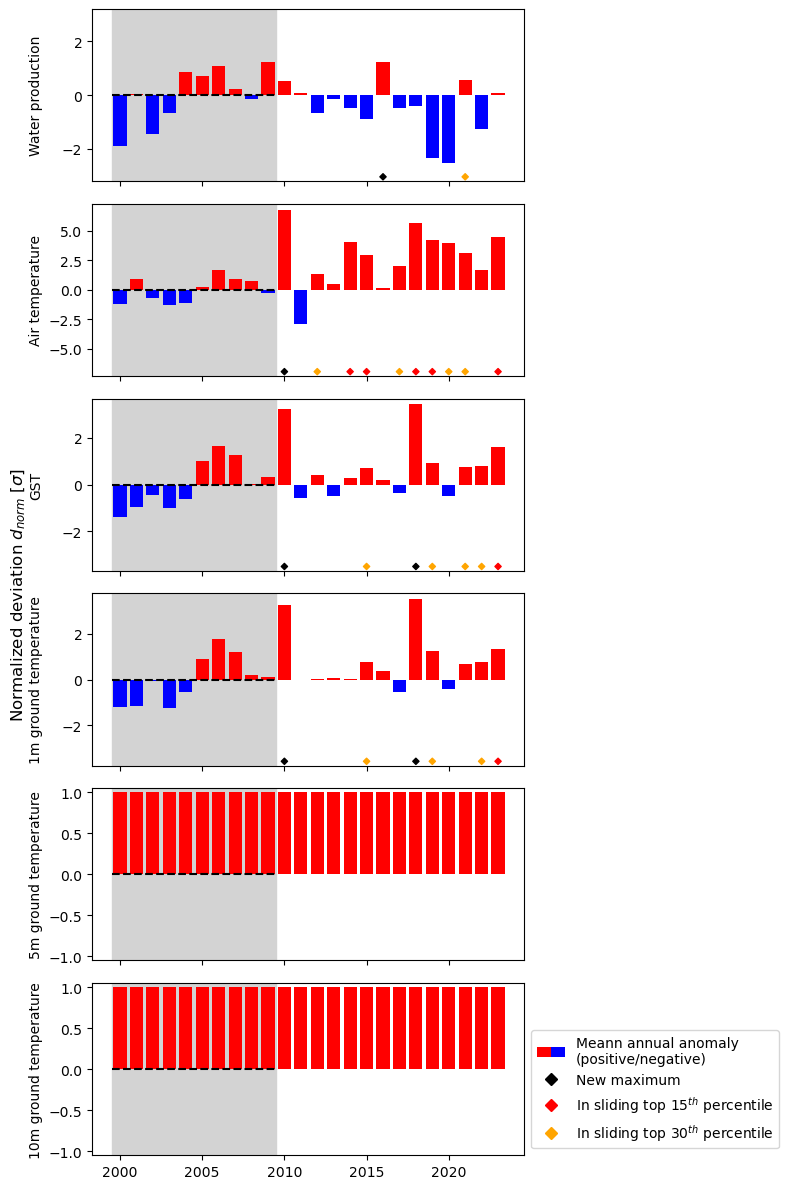

/fs/yedoma/home/vpo001/VikScriptsTests/SuPerSim/src/SuPerSim/runningstats.py:577: RuntimeWarning: invalid value encountered in scalar divide
  mean_dev = {y: (v-np.mean(bkg_pool))/np.std(bkg_pool) for y,v in annual_mean.items()}


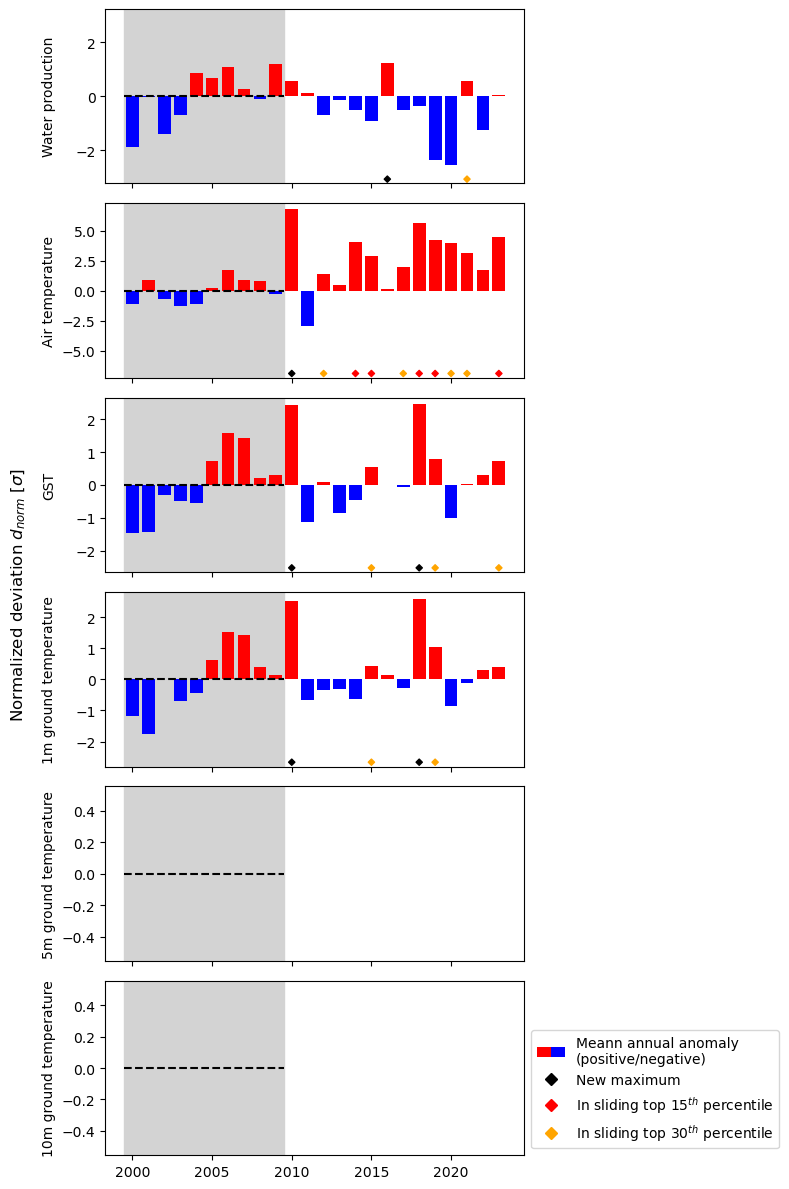


---------------------------------------------------------------------------------------------
------------------------------------- SPATIAL ANALYSIS --------------------------------------
---------------------------------------------------------------------------------------------


---------------------------------------------------------------------------------------------
-------------------------------------- FURTHER  PLOTS ---------------------------------------
---------------------------------------------------------------------------------------------


---------------------------------------------------------------------------------------------
---------------------------------- SUCCESSFULLY COMPLETED -----------------------------------
---------------------------------------------------------------------------------------------

Created a new pickle: dict_final_Aksaut_North_split_False.pkl


In [3]:
###############
# Ready to go #
###############

# When used for the first time, it createss the pickles
# When the pickles already exist, it simply loads them
# but it's easier to use the function 'load_all_pickles' for that
pkl = get_all_stats(
    forcing_list, path_forcing_list, path_metadata, path_ground, path_snow, path_pickle,
    year_bkg_end, year_trans_end, consecutive,
    site, date_event, topo_event,
    glacier, min_glacier_depth)

df = pkl['df']
reanalysis_stats = pkl['reanalysis_stats']
list_valid_sim = pkl['list_valid_sim']
dict_melt_out = pkl['dict_melt_out']
stats_melt_out_dic = pkl['stats_melt_out_dic']
df_stats = pkl['df_stats']
rockfall_values = pkl['rockfall_values']

# this is a function that allows the used to load the pickles in a much simpler way
pkl = load_all_pickles(site, path_pickle)

df = pkl['df']
reanalysis_stats = pkl['reanalysis_stats']
list_valid_sim = pkl['list_valid_sim']
dict_melt_out = pkl['dict_melt_out']
stats_melt_out_dic = pkl['stats_melt_out_dic']
df_stats = pkl['df_stats']
rockfall_values = pkl['rockfall_values']

# Finally, we can produce all the summary plots
final_dict= plot_all(site, path_forcing_list, path_ground, path_snow, path_swe, path_thaw_depth, path_pickle,
         year_bkg_end, year_trans_end, path_horizon=path_horizon, no_weight=no_weight,
         print_plots=print_plots, split_legend=split_legend, save_plots_pdf=save_plots_pdf,
         custom_years=custom_years, query=query,
         show_hor=show_hor, show_hist=show_hist, show_glaciers=show_glaciers, show_yearly_box=show_yearly_box,
         show_yearly_stats_atmos=show_yearly_stats_atmos, show_yearly_stats_sims=show_yearly_stats_sims,
         show_thaw_depth=show_thaw_depth, show_2metrics_seasonal=show_2metrics_seasonal,
         show_1metric_seasonal=show_1metric_seasonal, show_decades=show_decades,
         show_excep_years=show_excep_years, show_normdev=show_normdev, show_landslide_time=show_landslide_time,
         show_normdev_bar=show_normdev_bar,
         show_individual_heatmap=show_individual_heatmap, show_heatmaps=show_heatmaps, show_quantiles=show_quantiles,
         show_meltout=show_meltout, show_GST_evol=show_GST_evol, show_parity=show_parity)